<a href="https://colab.research.google.com/github/Rajarshi-Misra/Face-Recognition/blob/main/Face_Recognition_Using_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import tensorflow as tf
import os
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

from google.colab import files
files.upload()

!pip install -q kaggle

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets list

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                   480KB  2023-01-04 12:50:31           2030         85  1.0              
thedevastator/global-fossil-co2-emissions-by-country-2002-2022  Emissions by Country, 2002-2022              621KB  2023-01-02 20:10:36           1107         42  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset              Fifa World Cup 2022: Complete Dataset          7KB  2022-12-18 22:51:11           5463        177  1.0            

In [ ]:
!kaggle datasets download -d soumendraprasad/fifa-2022-all-players-image-dataset

fifa-2022-all-players-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip fifa-2022-all-players-image-dataset.zip

Archive:  fifa-2022-all-players-image-dataset.zip
replace Images/Images/Group A/Ecuador Players/Images_Alan Franco/Alan Franco1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Images/Images/Group A/Ecuador Players/Images_Alan Franco/Alan Franco1.jpg  
replace Images/Images/Group A/Ecuador Players/Images_Alan Franco/Alan Franco10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Images/Images/Group A/Ecuador Players/Images_Alan Franco/Alan Franco10.jpg  
replace Images/Images/Group A/Ecuador Players/Images_Alan Franco/Alan Franco11.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Images/Images/Group A/Ecuador Players/Images_Alan Franco/Alan Franco11.jpg  
replace Images/Images/Group A/Ecuador Players/Images_Alan Franco/Alan Franco12.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Images/Images/Group A/Ecuador Players/Images_Alan Franco/Alan Franco12.jpg  
replace Images/Images/Group A/Ecuador Players/Images_Alan Franco/Alan Franco13.jpg? [y]es, [n]o,

In [ ]:
!wget https://github.com/opencv/opencv/tree/master/data/haarcascades/haarcascade_frontalface_default.xml

--2023-01-15 12:19:37--  https://github.com/opencv/opencv/tree/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml [following]
--2023-01-15 12:19:37--  https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal     [ <=>                ]   9.74M  --.-KB/s    in 0.08s   

2023-01-15 12:19:39 (127 MB/s) - ‘haarcascade_frontalface_default.xml.1’ saved [10210484]



In [ ]:
filename = "./content/haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile
                                    (cv2.data.haarcascades+"haarcascade_frontalface_default.xml"))

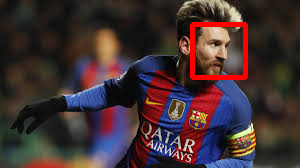

In [ ]:
from google.colab.patches import cv2_imshow
# image = cv2.imread('/content/Images/Images/Group F/Belgium Players/Images_Amadou Onana/Amadou Onana1.jpg')
image = cv2.imread('/content/Images/Images/Group C/Argentina Players/Images_Lionel Messi (captain)/Lionel Messi (captain)1.jpg')
# cv2_imshow(image)
# rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# cv2_imshow(rgb)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1,5)

for (x,y,w,h) in faces:
  cv2.rectangle(image, (x,y), (x+w,y+h),(0,0,255),3)
cv2_imshow(image)

In [ ]:
IMAGE_SIZE = (224,224)

In [ ]:
Messi = "/content/Images/Images/Group C/Argentina Players/Images_Lionel Messi (captain)"
Neymar = "/content/Images/Images/Group G/Brazil Players/Images_Neymar"
Ronaldo = "/content/Images/Images/Group H/Portugal Players/Images_Cristiano Ronaldo (captain)"

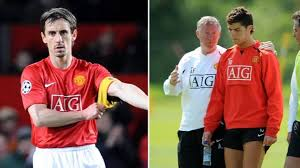

50


In [ ]:
from zmq.constants import CURVE
messi_imgs = []
for folder in os.listdir(Messi):
  # print(folder)
  messi_imgs.append(cv2.imread(os.path.join(Messi,folder)))

ronaldo_imgs = []
for folder in os.listdir(Ronaldo):
  # print(folder)
  ronaldo_imgs.append(cv2.imread(os.path.join(Ronaldo,folder)))

neymar_imgs = []
for folder in os.listdir(Neymar):
  # print(folder)
  neymar_imgs.append(cv2.imread(os.path.join(Neymar,folder)))

cv2_imshow(ronaldo_imgs[0])
print(len(messi_imgs))

In [ ]:
train=[]

def create_training_data():
    
    for i in range(50):
        arr=cv2.resize(messi_imgs[i], IMAGE_SIZE)
        train.append([arr,0])
        
    for i in range(50):
        arr=cv2.resize(ronaldo_imgs[i],IMAGE_SIZE)
        train.append([arr,1])

    for i in range(50):
        arr=cv2.resize(neymar_imgs[i],IMAGE_SIZE)
        train.append([arr,2])
create_training_data()
print(len(train))

150


In [ ]:
print(len(train))

150


In [ ]:
np.random.shuffle(train)

2


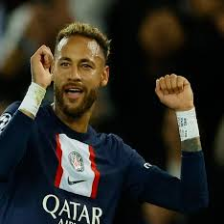

[array([[[146, 117, 112],
        [145, 116, 111],
        [143, 115, 110],
        ...,
        [ 48,  42,  43],
        [ 48,  42,  43],
        [ 49,  43,  44]],

       [[142, 114, 109],
        [141, 113, 108],
        [139, 112, 106],
        ...,
        [ 48,  41,  43],
        [ 48,  42,  43],
        [ 48,  42,  43]],

       [[136, 110, 104],
        [135, 109, 103],
        [134, 108, 102],
        ...,
        [ 46,  40,  41],
        [ 47,  41,  41],
        [ 47,  41,  42]],

       ...,

       [[ 11,   3, 104],
        [ 13,   4, 111],
        [ 15,   3, 117],
        ...,
        [ 29,  18, 155],
        [ 24,  14, 151],
        [ 19,   8, 146]],

       [[  2,   0,  81],
        [ 10,   4,  95],
        [ 15,   4, 109],
        ...,
        [ 25,  12, 152],
        [ 17,   7, 141],
        [ 10,   2, 133]],

       [[  1,   0,  78],
        [ 10,   5,  92],
        [ 16,   5, 107],
        ...,
        [ 20,   7, 147],
        [ 14,   6, 138],
        [ 12,   4, 134]

In [ ]:
X=[]
y=[]
for img,label in train:
    X.append(img)
    y.append(label)
print(y[1])
cv2_imshow(X[1])
print(X)

In [ ]:
#tf.keras.preprocessing.image.ImageDataGenerator()

In [ ]:
base_model = tf.keras.applications.vgg16.VGG16(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
base_model.summary()
print(len(base_model.layers))

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
preds = tf.keras.layers.Dense(3, activation = 'sigmoid')(x)
base_model.trainable = False
model = tf.keras.Model(inputs=base_model.input, outputs=preds)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [104]:
model.compile(optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [105]:
gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)
# print(len(X))
# print(len(y))
# print(np.shape(X))
X_tf = tf.convert_to_tensor(X, np.float32)
print(np.shape(X_tf))
y_train = tf.keras.utils.to_categorical(y, 3)
train = gen.flow(x=X_tf,y=y_train)
model.fit(
  train, 
  batch_size = 1,
  verbose = 1,
  epochs = 10)

(150, 224, 224, 3)
Epoch 1/10
5/5 [==============================] - 2s 157ms/step - loss: 0.6945 - accuracy: 0.7667
Epoch 2/10
5/5 [==============================] - 1s 160ms/step - loss: 0.4837 - accuracy: 0.8400
Epoch 3/10
5/5 [==============================] - 1s 160ms/step - loss: 0.3178 - accuracy: 0.8600
Epoch 4/10
5/5 [==============================] - 1s 159ms/step - loss: 0.2175 - accuracy: 0.9467
Epoch 5/10
5/5 [==============================] - 1s 171ms/step - loss: 0.1408 - accuracy: 0.9667
Epoch 6/10
5/5 [==============================] - 1s 160ms/step - loss: 0.0879 - accuracy: 0.9867
Epoch 7/10
5/5 [==============================] - 1s 164ms/step - loss: 0.0459 - accuracy: 1.0000
Epoch 8/10
5/5 [==============================] - 1s 164ms/step - loss: 0.0285 - accuracy: 1.0000
Epoch 9/10
5/5 [==============================] - 1s 164ms/step - loss: 0.0158 - accuracy: 1.0000
Epoch 10/10
5/5 [==============================] - 1s 166ms/step - loss: 0.0160 - accuracy: 1.0000
